## 코로나-19, 실제로 약국에 도움이 되었을까?

### 이번 2023 소프트웨어 경진대회로 주어진 데이터중, 우리 팀(의 나)는 "3. 전국 약국 현황"과 "코로나-19 확진자 통계"(https://ncov.kdca.go.kr/bdBoardListR.do?brdId=1&brdGubun=11) 데이터들을 이용하여, 코로나-19가 약국에 실제로 영향을 미쳤는지, 미쳤다면 어느 방향으로 얼마나 미쳤을 지 알아보기로 하였다. 들어가기에 앞서, 먼저 데이터 전처리가 필요하다.

In [2]:
#라이브러리 불러오기
%pip install pandas
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
plt.rc("font", family = "malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
#파일 불러오기
f=open("src/yakkok.csv", encoding="cp949")
data_old=csv.reader(f)
header_old=next(data_old) #데이터의 정보가 담김
data_old=list(data_old) #실제 데이터가 담김
print(header_old)
for row in data_old[:5]:
    print(row)

['암호화요양기호', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명', '읍면동', '우편번호', '주소', '전화번호', '개설일자', '좌표(x)', '좌표(y)']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxMzUxIzExIyQxIyQ3IyQ4OSQzNjE4MzIjNDEjJDEjJDQjJDgz', '스카이약국', '81', '약국', '110000', '서울', '110021', '서초구', '', '6562', '서울특별시 서초구 방배로 199, 1층 C호 (방배동)', '02-532-7225', '20230424', '126.9911577', '37.4911126']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxNzAyIzUxIyQxIyQ1IyQ4MiQyNjEwMDIjNjEjJDEjJDAjJDgz', '화인약국', '81', '약국', '110000', '서울', '110018', '송파구', '', '5833', '서울특별시 송파구 중대로 80, (문정동, 롯데마트 3층)', '02-449-0895', '20060102', '127.1178428', '37.491762']
['JDQ4MTg4MSM1MSMkMSMkNCMkMDMkNDgxNzAyIzUxIyQxIyQ1IyQ4MiQyNjEyMjIjNTEjJDEjJDIjJDgz', '마프자서울약국', '81', '약국', '110000', '서울', '110009', '마포구', '', '4124', '서울특별시 마포구 대흥로24길 24, 상가A동 206호 (염리동)', '02-711-3119', '20210409', '126.9476615', '37.553974']
['JDQ4MTYyMiM1MSMkMSMkMCMkMDMkMzgxOTYxIzUxIyQxIyQ1IyQ3OSQyNjE4MzIjNjEjJDEjJDgjJDgz', '박하향약국', '81', '약국', '220000', '인천', '220005', '인천서구', '

#### 보다시피, 실제로 쓰기엔 부적절하거나 안 사용할 데이터가 있는 것을 확인할 수 있다. 우리가 편지를 보낼 것도 아니고, 우편번호같은 데이터는 필요 없을 것이기에 적절히 편집하였다. 또한, 확진자 통계에 관련된 데이터도 불러와주자.

In [4]:
#새 파일(그리고 코로나) 불러오기
f=open("src/new_yakkok.csv", encoding="cp949")
data=csv.reader(f)
header=next(data) #데이터의 정보가 담김
data=list(data) #실제 데이터가 담김
print(header)
for row in data[:5]: #실제 데이터의 5행만큼만, 한 줄씩 출력
    print(row)
    
f=open("src/corona.csv", encoding="cp949")
datac=csv.reader(f)
headerc=next(datac) #데이터의 정보가 담김
datac=list(datac) #실제 데이터가 담김
print(headerc)
for row in datac[:10]: #실제 데이터의 10행만큼만, 한 줄씩 출력
    print(row)

['요양기관명', '시도코드명', '시군구코드명', '주소', '전화번호', '개설일자', '좌표(x)', '좌표(y)']
['스카이약국', '서울', '서초구', '서울특별시 서초구 방배로 199, 1층 C호 (방배동)', '02-532-7225', '20230424', '126.9911577', '37.4911126']
['화인약국', '서울', '송파구', '서울특별시 송파구 중대로 80, (문정동, 롯데마트 3층)', '02-449-0895', '20060102', '127.1178428', '37.491762']
['마프자서울약국', '서울', '마포구', '서울특별시 마포구 대흥로24길 24, 상가A동 206호 (염리동)', '02-711-3119', '20210409', '126.9476615', '37.553974']
['박하향약국', '인천', '인천서구', '인천광역시 서구 이음대로 392, 메트로시티 106,107호 (원당동)', '032-568-8591', '20230418', '126.7127253', '37.5926069']
['좋은우리약국', '경기', '김포시', '경기도 김포시 감암로 7, (걸포동)', '031-987-7718', '20230412', '126.7111628', '37.6319034']
['일자', '계(명)', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '검역']
['누적(명)', '34,571,873 ', '6,751,223 ', '2,092,592 ', '1,516,396 ', '1,991,875 ', '1,018,481 ', '1,013,271 ', '738,120 ', '273,413 ', '9,266,555 ', '1,005,827 ', '1,075,459 ', '1,390,748 ', '1,167,903 ', '1,142,438 ', '1,581,188 ', '2

#### 결측치가 얼마나 있는지도 확인해봐야 할 거 같다.

In [5]:
d=pd.read_csv("src/new_yakkok.csv", encoding="cp949") # pandas 모듈을 이용해 정보를 확인해보자.
d.info()
print()
d2=pd.read_csv("src/corona.csv", encoding="cp949") # 코로나 관련 데이터도
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24654 entries, 0 to 24653
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요양기관명   24654 non-null  object 
 1   시도코드명   24654 non-null  object 
 2   시군구코드명  24654 non-null  object 
 3   주소      24654 non-null  object 
 4   전화번호    24025 non-null  object 
 5   개설일자    24643 non-null  float64
 6   좌표(x)   24169 non-null  float64
 7   좌표(y)   24169 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.5+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      1321 non-null   object
 1   계(명)    1321 non-null   object
 2   서울      1321 non-null   object
 3   부산      1321 non-null   object
 4   대구      1321 non-null   object
 5   인천      1321 non-null   object
 6   광주      1321 non-null   object
 7   대전      1321 non-null   object
 8

#### 코로나 관련 데이터는 적어도 비어있는 데이터는 없지만, 약국 데이터, 특히 개설일자가 빈 행이 있다. 주의하면서 진행하도록 하자.

### 먼저, 지역별로 살펴보기 이전에, 간단하게 전국적으로 알아보자.

#### 차근차근 접근해보자:

##### 현재 등록된 약국들은, 언제 가장 많이 개설되었을까? (1990년대 이후)

921


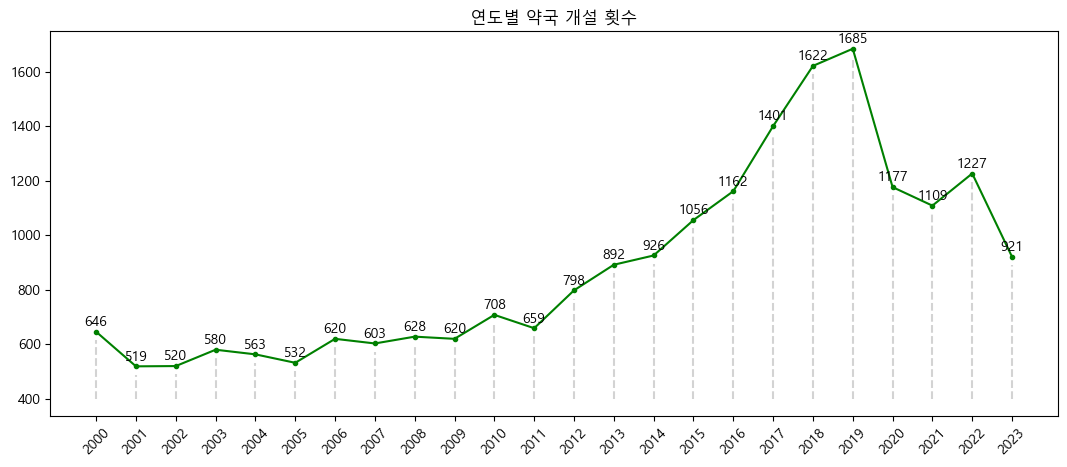

In [28]:
# 약국의 개설년도를 꺾은선그래프로 시각화 하여 보자.
whenYear = {} # 몇 년도가 나올지는 모르니, 딕셔너리를 활용하여보자.
for row in data:
    if row[5] and int(row[5][:4])>=2000: #개설 일자가 실제로 존재하면서, 1990년대 이후라면..
        if int(row[5][:4]) in whenYear: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
            whenYear[int(row[5][:4])]+=1 #기존값에 1을 더해다다
        else:
            whenYear[int(row[5][:4])]=1 #없다면 그냥 새로 만들어주자.
print(whenYear[2023])            

plt.figure(figsize=(13,5)) #화면 크기 설정
plt.title("연도별 약국 개설 횟수") #제목 설정
whenYear=dict(sorted(whenYear.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
plt.xticks([i for i in range(2000, 2024, 1)], rotation=45) #X축 간격 설정 
plt.yticks([i for i in range(400, 2001, 200)]) #Y축 간격 설정
plt.plot(whenYear.keys(), whenYear.values(), color="green", marker='.') #기본 그래프 그리기
for i in whenYear.keys(): 
    height = whenYear[i]
    plt.text(i, height + 10, '%d' %height, ha='center', va='bottom', size = 10) #실제 값을 그래프에 적어준다.
for i in whenYear.keys():
    plt.plot([i, i], [400, whenYear[i]-30], color="lightgray", linestyle='dashed') #가독성을 위해 점선도 그려주자
plt.show() 

##### 코로나 시점 이후로 유의미하게 개업하는지 먼저 확인해보자.

In [ ]:
# 약국 개업 시점에 대한 꺾은선 그래프를 시각화하여 겹쳐보자.
t = {} # 이번엔 달까지 이용해보자. 딕셔너리를 활용하여보자.
for row in data:
    if row[5] and 2023>=int(row[5][:4])>=2000: #개설 일자가 실제로 존재하면서, 1990년대 이후라면..
        if int(row[5][:4]) in t: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
            t[int(row[5][:4])]+=1 #기존값에 1을 더해다다
        else:
            t[int(row[5][:4])]=1 #없다면 그냥 새로 만들어주자.
print(t[2023])            

plt.figure(figsize=(13,5)) #화면 크기 설정
plt.title("연도별 약국 개설 횟수") #제목 설정
t=dict(sorted(t.items())) #꺾은선 그래프를 활용하기 위해 sorted 함수를 이용해준다.
plt.xticks([i for i in range(2000, 2024, 1)], rotation=45) #X축 간격 설정 
plt.yticks([i for i in range(400, 2001, 200)]) #Y축 간격 설정
plt.plot(t.keys(), t.values(), color="green", marker='.') #기본 그래프 그리기
for i in t.keys(): 
    height = t[i]
    plt.text(i, height + 10, '%d' %height, ha='center', va='bottom', size = 10) #실제 값을 그래프에 적어준다.
for i in t.keys():
    plt.plot([i, i], [400, t[i]-30], color="lightgray", linestyle='dashed') #가독성을 위해 점선도 그려주자
plt.show() 

##### 코로나 확진자 수와 약국 개업 시점이 실제로 영향을 주는지 알아보자.

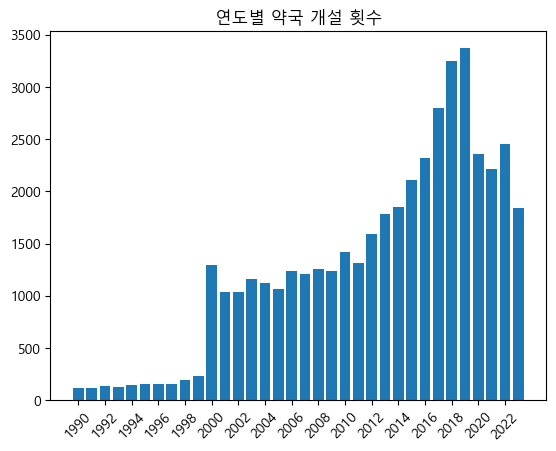

In [7]:
# 코로나 확진자 수에 대한 꺾은선 그래프와, 약국 개업 시점에 대한 꺾은선 그래프를 시각화하여 겹쳐보자.
t = {} # 이번엔 , 딕셔너리를 활용하여보자.
tt = [] # 확진자 수에 대한 
for row in data:
    if row[5] and int(row[5][:4])>=1990: #개설 일자가 실제로 존재하면서, 1990년대 이후라면..
        if int(row[5][:4]) in whenYear: #만약 딕셔너리에 해당 년도를 key로 가진 value가 있다면..
            whenYear[int(row[5][:4])]+=1 #기존값에 1을 더해다다
        else:
            whenYear[int(row[5][:4])]=1 #없다면 그냥 새로 만들어주자.
            

plt.title("연도별 약국 개설 횟수")
plt.xticks([i for i in range(1990, 2023, 2)], rotation=45)
plt.bar(whenYear.keys(), whenYear.values())
plt.show()